In [1]:
import os,sys
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import pennylane as qml
import torch
import numpy as np

In [3]:
qml.__version__

'0.8.0-dev'

In [4]:
import builtins
import time

In [5]:
#builtins.dev_qubit  = qml.device('qiskit.aer', wires=6,shots=200)
#builtins.dev_qubit  = qml.device('qiskit.aer', wires=6)
builtins.dev_qubit  = qml.device('default.qubit', wires=6)

In [6]:
from modules.QCircuitNet import QCircuitNet

In [7]:
model=QCircuitNet()

Parameter containing:
tensor([0.0747, 0.9639, 0.4793, 0.5260, 0.6891, 0.4993, 0.2405, 0.5362, 0.5112,
        0.3602, 0.5132, 0.9754], requires_grad=True)


In [8]:
from utils.data_handling import simple_np_ds

In [9]:
dset=simple_np_ds("../data/moons.npz",val_split=0.2,test_split=0.2)

In [10]:
class CONFIG:
    pass
config=CONFIG()
config.batch_size_test = 1
config.batch_size_train = 2
config.batch_size_val = 1
config.num_val_samples=20
config.num_train_ensembles=8
config.lr=0.005
config.device = 'cpu'
config.num_workers_train=3
config.num_workers_val=2
config.num_workers_test=2
config.dump_path = '../model_state_dumps'

In [11]:
from modules.engine import Engine

In [12]:
engine=Engine(model,dset,config)

Sticking to CPU
Creating a directory for run dump: ../model_state_dumps/20191126_084303/


In [13]:
%%time
engine.train(epochs=20,report_interval=1,valid_interval=50)

Epoch 0 Starting @ 2019-11-26 08:43:03
... Iteration 0 ... Epoch 0.00 ... Validation Loss 1.777
Saved checkpoint as: ../model_state_dumps/20191126_084303/QCircuitNet.pth
best validation loss so far!: 1.777016196626937
Saved checkpoint as: ../model_state_dumps/20191126_084303/QCircuitNetBEST.pth
... Iteration 1 ... Epoch 0.01 ... Loss 3.062
... Iteration 2 ... Epoch 0.01 ... Loss 0.250
... Iteration 3 ... Epoch 0.01 ... Loss 0.105
... Iteration 4 ... Epoch 0.02 ... Loss 3.062
... Iteration 5 ... Epoch 0.03 ... Loss 0.152
... Iteration 6 ... Epoch 0.03 ... Loss 0.488
... Iteration 7 ... Epoch 0.04 ... Loss 3.062
... Iteration 8 ... Epoch 0.04 ... Loss 3.062
... Iteration 9 ... Epoch 0.04 ... Loss 2.250
... Iteration 10 ... Epoch 0.05 ... Loss 0.259
... Iteration 11 ... Epoch 0.05 ... Loss 3.062
... Iteration 12 ... Epoch 0.06 ... Loss 0.455
... Iteration 13 ... Epoch 0.06 ... Loss 3.062
... Iteration 14 ... Epoch 0.07 ... Loss 0.142
... Iteration 15 ... Epoch 0.07 ... Loss 0.512
... Iter

... Iteration 156 ... Epoch 0.78 ... Loss 3.062
... Iteration 157 ... Epoch 0.79 ... Loss 4.000
... Iteration 158 ... Epoch 0.79 ... Loss 0.107
... Iteration 159 ... Epoch 0.80 ... Loss 4.000
... Iteration 160 ... Epoch 0.80 ... Loss 2.250
... Iteration 161 ... Epoch 0.81 ... Loss 3.062
... Iteration 162 ... Epoch 0.81 ... Loss 0.333
... Iteration 163 ... Epoch 0.82 ... Loss 0.266
... Iteration 164 ... Epoch 0.82 ... Loss 2.250
... Iteration 165 ... Epoch 0.83 ... Loss 4.000
... Iteration 166 ... Epoch 0.83 ... Loss 0.027
... Iteration 167 ... Epoch 0.84 ... Loss 0.131
... Iteration 168 ... Epoch 0.84 ... Loss 0.144
... Iteration 169 ... Epoch 0.85 ... Loss 3.062
... Iteration 170 ... Epoch 0.85 ... Loss 0.384
... Iteration 171 ... Epoch 0.86 ... Loss 0.216
... Iteration 172 ... Epoch 0.86 ... Loss 3.062
... Iteration 173 ... Epoch 0.87 ... Loss 3.062
... Iteration 174 ... Epoch 0.87 ... Loss 0.185
... Iteration 175 ... Epoch 0.88 ... Loss 0.197
... Iteration 176 ... Epoch 0.88 ... Los

... Iteration 317 ... Epoch 1.58 ... Loss 0.401
... Iteration 318 ... Epoch 1.59 ... Loss 4.000
... Iteration 319 ... Epoch 1.59 ... Loss 3.062
... Iteration 320 ... Epoch 1.60 ... Loss 2.250
... Iteration 321 ... Epoch 1.60 ... Loss 0.250
... Iteration 322 ... Epoch 1.61 ... Loss 0.034
... Iteration 323 ... Epoch 1.61 ... Loss 0.433
... Iteration 324 ... Epoch 1.62 ... Loss 0.417
... Iteration 325 ... Epoch 1.62 ... Loss 0.084
... Iteration 326 ... Epoch 1.63 ... Loss 0.131
... Iteration 327 ... Epoch 1.63 ... Loss 3.062
... Iteration 328 ... Epoch 1.64 ... Loss 4.000
... Iteration 329 ... Epoch 1.64 ... Loss 0.302
... Iteration 330 ... Epoch 1.65 ... Loss 0.283
... Iteration 331 ... Epoch 1.65 ... Loss 0.250
... Iteration 332 ... Epoch 1.66 ... Loss 2.250
... Iteration 333 ... Epoch 1.66 ... Loss 0.250
... Iteration 334 ... Epoch 1.67 ... Loss 3.062
... Iteration 335 ... Epoch 1.67 ... Loss 0.075
... Iteration 336 ... Epoch 1.68 ... Loss 0.106
... Iteration 337 ... Epoch 1.68 ... Los

... Iteration 475 ... Epoch 2.37 ... Loss 0.052
... Iteration 476 ... Epoch 2.38 ... Loss 4.000
... Iteration 477 ... Epoch 2.38 ... Loss 2.250
... Iteration 478 ... Epoch 2.39 ... Loss 4.000
... Iteration 479 ... Epoch 2.39 ... Loss 0.265
... Iteration 480 ... Epoch 2.40 ... Loss 4.000
... Iteration 481 ... Epoch 2.40 ... Loss 3.062
... Iteration 482 ... Epoch 2.41 ... Loss 0.372
... Iteration 483 ... Epoch 2.41 ... Loss 3.062
... Iteration 484 ... Epoch 2.42 ... Loss 4.000
... Iteration 485 ... Epoch 2.42 ... Loss 3.062
... Iteration 486 ... Epoch 2.43 ... Loss 0.130
... Iteration 487 ... Epoch 2.43 ... Loss 0.068
... Iteration 488 ... Epoch 2.44 ... Loss 3.062
... Iteration 489 ... Epoch 2.44 ... Loss 0.482
... Iteration 490 ... Epoch 2.45 ... Loss 0.250
... Iteration 491 ... Epoch 2.45 ... Loss 2.250
... Iteration 492 ... Epoch 2.46 ... Loss 0.142
... Iteration 493 ... Epoch 2.46 ... Loss 0.214
... Iteration 494 ... Epoch 2.47 ... Loss 4.000
... Iteration 495 ... Epoch 2.47 ... Los

... Iteration 633 ... Epoch 3.16 ... Loss 2.250
... Iteration 634 ... Epoch 3.17 ... Loss 3.062
... Iteration 635 ... Epoch 3.17 ... Loss 3.062
... Iteration 636 ... Epoch 3.18 ... Loss 3.062
... Iteration 637 ... Epoch 3.18 ... Loss 3.062
... Iteration 638 ... Epoch 3.19 ... Loss 0.250
... Iteration 639 ... Epoch 3.19 ... Loss 4.000
... Iteration 640 ... Epoch 3.20 ... Loss 0.250
... Iteration 641 ... Epoch 3.20 ... Loss 0.091
... Iteration 642 ... Epoch 3.21 ... Loss 4.000
... Iteration 643 ... Epoch 3.21 ... Loss 0.026
... Iteration 644 ... Epoch 3.22 ... Loss 2.250
... Iteration 645 ... Epoch 3.22 ... Loss 4.000
... Iteration 646 ... Epoch 3.23 ... Loss 4.000
... Iteration 647 ... Epoch 3.23 ... Loss 0.115
... Iteration 648 ... Epoch 3.24 ... Loss 0.329
... Iteration 649 ... Epoch 3.24 ... Loss 2.250
... Iteration 650 ... Epoch 3.25 ... Loss 3.062
starting over on the training set
... Iteration 650 ... Epoch 3.25 ... Validation Loss 1.593
Saved checkpoint as: ../model_state_dumps/2

... Iteration 794 ... Epoch 3.97 ... Loss 0.069
... Iteration 795 ... Epoch 3.97 ... Loss 4.000
... Iteration 796 ... Epoch 3.98 ... Loss 0.133
... Iteration 797 ... Epoch 3.98 ... Loss 0.250
... Iteration 798 ... Epoch 3.99 ... Loss 3.062
... Iteration 799 ... Epoch 3.99 ... Loss 4.000
... Iteration 800 ... Epoch 4.00 ... Loss 2.250
Epoch 4 Starting @ 2019-11-26 08:52:28
starting over on the training set
... Iteration 800 ... Epoch 4.00 ... Validation Loss 1.455
Saved checkpoint as: ../model_state_dumps/20191126_084303/QCircuitNet.pth
... Iteration 801 ... Epoch 4.00 ... Loss 0.250
... Iteration 802 ... Epoch 4.01 ... Loss 4.000
... Iteration 803 ... Epoch 4.01 ... Loss 0.001
... Iteration 804 ... Epoch 4.02 ... Loss 0.019
... Iteration 805 ... Epoch 4.02 ... Loss 0.080
... Iteration 806 ... Epoch 4.03 ... Loss 0.079
... Iteration 807 ... Epoch 4.03 ... Loss 0.091
... Iteration 808 ... Epoch 4.04 ... Loss 2.250
... Iteration 809 ... Epoch 4.04 ... Loss 0.116
... Iteration 810 ... Epoc

... Iteration 952 ... Epoch 4.76 ... Loss 0.148
... Iteration 953 ... Epoch 4.76 ... Loss 4.000
... Iteration 954 ... Epoch 4.77 ... Loss 0.093
... Iteration 955 ... Epoch 4.77 ... Loss 0.250
... Iteration 956 ... Epoch 4.78 ... Loss 0.021
... Iteration 957 ... Epoch 4.78 ... Loss 0.145
... Iteration 958 ... Epoch 4.79 ... Loss 0.041
... Iteration 959 ... Epoch 4.79 ... Loss 3.062
... Iteration 960 ... Epoch 4.80 ... Loss 0.250
... Iteration 961 ... Epoch 4.80 ... Loss 3.062
... Iteration 962 ... Epoch 4.81 ... Loss 4.000
... Iteration 963 ... Epoch 4.81 ... Loss 0.205
... Iteration 964 ... Epoch 4.82 ... Loss 2.250
... Iteration 965 ... Epoch 4.82 ... Loss 0.118
... Iteration 966 ... Epoch 4.83 ... Loss 0.250
... Iteration 967 ... Epoch 4.83 ... Loss 3.062
... Iteration 968 ... Epoch 4.84 ... Loss 0.022
... Iteration 969 ... Epoch 4.84 ... Loss 0.047
... Iteration 970 ... Epoch 4.85 ... Loss 3.062
... Iteration 971 ... Epoch 4.85 ... Loss 3.062
... Iteration 972 ... Epoch 4.86 ... Los

... Iteration 1110 ... Epoch 5.55 ... Loss 0.071
... Iteration 1111 ... Epoch 5.55 ... Loss 2.250
... Iteration 1112 ... Epoch 5.56 ... Loss 2.250
... Iteration 1113 ... Epoch 5.56 ... Loss 0.010
... Iteration 1114 ... Epoch 5.57 ... Loss 0.016
... Iteration 1115 ... Epoch 5.57 ... Loss 4.000
... Iteration 1116 ... Epoch 5.58 ... Loss 0.164
... Iteration 1117 ... Epoch 5.58 ... Loss 0.141
... Iteration 1118 ... Epoch 5.59 ... Loss 0.185
... Iteration 1119 ... Epoch 5.59 ... Loss 4.000
... Iteration 1120 ... Epoch 5.60 ... Loss 3.062
... Iteration 1121 ... Epoch 5.60 ... Loss 2.250
... Iteration 1122 ... Epoch 5.61 ... Loss 0.250
... Iteration 1123 ... Epoch 5.61 ... Loss 0.250
... Iteration 1124 ... Epoch 5.62 ... Loss 2.250
... Iteration 1125 ... Epoch 5.62 ... Loss 2.250
... Iteration 1126 ... Epoch 5.63 ... Loss 0.085
... Iteration 1127 ... Epoch 5.63 ... Loss 2.250
... Iteration 1128 ... Epoch 5.64 ... Loss 0.095
... Iteration 1129 ... Epoch 5.64 ... Loss 0.200
... Iteration 1130 .

... Iteration 1265 ... Epoch 6.32 ... Loss 0.008
... Iteration 1266 ... Epoch 6.33 ... Loss 0.164
... Iteration 1267 ... Epoch 6.33 ... Loss 0.005
... Iteration 1268 ... Epoch 6.34 ... Loss 4.000
... Iteration 1269 ... Epoch 6.34 ... Loss 0.149
... Iteration 1270 ... Epoch 6.35 ... Loss 2.250
... Iteration 1271 ... Epoch 6.35 ... Loss 0.000
... Iteration 1272 ... Epoch 6.36 ... Loss 3.062
... Iteration 1273 ... Epoch 6.36 ... Loss 4.000
... Iteration 1274 ... Epoch 6.37 ... Loss 0.123
... Iteration 1275 ... Epoch 6.37 ... Loss 0.025
... Iteration 1276 ... Epoch 6.38 ... Loss 3.062
... Iteration 1277 ... Epoch 6.38 ... Loss 0.081
... Iteration 1278 ... Epoch 6.39 ... Loss 0.002
... Iteration 1279 ... Epoch 6.39 ... Loss 0.142
... Iteration 1280 ... Epoch 6.40 ... Loss 2.250
... Iteration 1281 ... Epoch 6.40 ... Loss 2.250
... Iteration 1282 ... Epoch 6.41 ... Loss 2.250
... Iteration 1283 ... Epoch 6.41 ... Loss 4.000
... Iteration 1284 ... Epoch 6.42 ... Loss 0.084
... Iteration 1285 .

... Iteration 1422 ... Epoch 7.11 ... Loss 3.062
... Iteration 1423 ... Epoch 7.11 ... Loss 0.250
... Iteration 1424 ... Epoch 7.12 ... Loss 0.113
... Iteration 1425 ... Epoch 7.12 ... Loss 3.062
... Iteration 1426 ... Epoch 7.13 ... Loss 0.069
... Iteration 1427 ... Epoch 7.13 ... Loss 2.250
... Iteration 1428 ... Epoch 7.14 ... Loss 2.250
... Iteration 1429 ... Epoch 7.14 ... Loss 3.062
... Iteration 1430 ... Epoch 7.15 ... Loss 0.087
... Iteration 1431 ... Epoch 7.15 ... Loss 0.102
... Iteration 1432 ... Epoch 7.16 ... Loss 3.062
... Iteration 1433 ... Epoch 7.16 ... Loss 0.005
... Iteration 1434 ... Epoch 7.17 ... Loss 0.250
... Iteration 1435 ... Epoch 7.17 ... Loss 0.030
... Iteration 1436 ... Epoch 7.18 ... Loss 0.084
... Iteration 1437 ... Epoch 7.18 ... Loss 4.000
... Iteration 1438 ... Epoch 7.19 ... Loss 4.000
... Iteration 1439 ... Epoch 7.19 ... Loss 0.178
... Iteration 1440 ... Epoch 7.20 ... Loss 4.000
... Iteration 1441 ... Epoch 7.20 ... Loss 2.250
... Iteration 1442 .

... Iteration 1579 ... Epoch 7.89 ... Loss 3.062
... Iteration 1580 ... Epoch 7.90 ... Loss 2.250
... Iteration 1581 ... Epoch 7.90 ... Loss 0.250
... Iteration 1582 ... Epoch 7.91 ... Loss 0.114
... Iteration 1583 ... Epoch 7.91 ... Loss 0.085
... Iteration 1584 ... Epoch 7.92 ... Loss 2.250
... Iteration 1585 ... Epoch 7.92 ... Loss 4.000
... Iteration 1586 ... Epoch 7.93 ... Loss 0.004
... Iteration 1587 ... Epoch 7.93 ... Loss 2.250
... Iteration 1588 ... Epoch 7.94 ... Loss 3.062
... Iteration 1589 ... Epoch 7.94 ... Loss 0.024
... Iteration 1590 ... Epoch 7.95 ... Loss 3.062
... Iteration 1591 ... Epoch 7.95 ... Loss 2.250
... Iteration 1592 ... Epoch 7.96 ... Loss 0.093
... Iteration 1593 ... Epoch 7.96 ... Loss 3.062
... Iteration 1594 ... Epoch 7.97 ... Loss 0.071
... Iteration 1595 ... Epoch 7.97 ... Loss 0.007
... Iteration 1596 ... Epoch 7.98 ... Loss 2.250
... Iteration 1597 ... Epoch 7.98 ... Loss 2.250
... Iteration 1598 ... Epoch 7.99 ... Loss 3.062
... Iteration 1599 .

... Iteration 1737 ... Epoch 8.68 ... Loss 3.062
... Iteration 1738 ... Epoch 8.69 ... Loss 0.065
... Iteration 1739 ... Epoch 8.69 ... Loss 0.002
... Iteration 1740 ... Epoch 8.70 ... Loss 3.062
... Iteration 1741 ... Epoch 8.70 ... Loss 3.062
... Iteration 1742 ... Epoch 8.71 ... Loss 0.250
... Iteration 1743 ... Epoch 8.71 ... Loss 3.062
... Iteration 1744 ... Epoch 8.72 ... Loss 0.088
... Iteration 1745 ... Epoch 8.72 ... Loss 2.250
... Iteration 1746 ... Epoch 8.73 ... Loss 0.067
... Iteration 1747 ... Epoch 8.73 ... Loss 3.062
... Iteration 1748 ... Epoch 8.74 ... Loss 0.250
... Iteration 1749 ... Epoch 8.74 ... Loss 0.250
... Iteration 1750 ... Epoch 8.75 ... Loss 0.096
starting over on the training set
... Iteration 1750 ... Epoch 8.75 ... Validation Loss 1.870
Saved checkpoint as: ../model_state_dumps/20191126_084303/QCircuitNet.pth
... Iteration 1751 ... Epoch 8.75 ... Loss 2.250
... Iteration 1752 ... Epoch 8.76 ... Loss 0.250
... Iteration 1753 ... Epoch 8.76 ... Loss 0.011

... Iteration 1894 ... Epoch 9.47 ... Loss 4.000
... Iteration 1895 ... Epoch 9.48 ... Loss 0.250
... Iteration 1896 ... Epoch 9.48 ... Loss 0.250
... Iteration 1897 ... Epoch 9.49 ... Loss 2.250
... Iteration 1898 ... Epoch 9.49 ... Loss 3.062
... Iteration 1899 ... Epoch 9.50 ... Loss 0.001
... Iteration 1900 ... Epoch 9.50 ... Loss 3.062
... Iteration 1900 ... Epoch 9.50 ... Validation Loss 1.281
Saved checkpoint as: ../model_state_dumps/20191126_084303/QCircuitNet.pth
... Iteration 1901 ... Epoch 9.51 ... Loss 0.072
... Iteration 1902 ... Epoch 9.51 ... Loss 0.077
... Iteration 1903 ... Epoch 9.52 ... Loss 0.250
... Iteration 1904 ... Epoch 9.52 ... Loss 3.062
... Iteration 1905 ... Epoch 9.53 ... Loss 0.250
... Iteration 1906 ... Epoch 9.53 ... Loss 0.026
... Iteration 1907 ... Epoch 9.54 ... Loss 4.000
... Iteration 1908 ... Epoch 9.54 ... Loss 0.075
... Iteration 1909 ... Epoch 9.55 ... Loss 0.001
... Iteration 1910 ... Epoch 9.55 ... Loss 2.250
... Iteration 1911 ... Epoch 9.56

... Iteration 2050 ... Epoch 10.25 ... Loss 0.002
starting over on the training set
... Iteration 2050 ... Epoch 10.25 ... Validation Loss 1.268
Saved checkpoint as: ../model_state_dumps/20191126_084303/QCircuitNet.pth
... Iteration 2051 ... Epoch 10.26 ... Loss 3.062
... Iteration 2052 ... Epoch 10.26 ... Loss 3.062
... Iteration 2053 ... Epoch 10.27 ... Loss 0.250
... Iteration 2054 ... Epoch 10.27 ... Loss 4.000
... Iteration 2055 ... Epoch 10.28 ... Loss 0.070
... Iteration 2056 ... Epoch 10.28 ... Loss 0.001
... Iteration 2057 ... Epoch 10.29 ... Loss 0.136
... Iteration 2058 ... Epoch 10.29 ... Loss 0.250
... Iteration 2059 ... Epoch 10.30 ... Loss 2.250
... Iteration 2060 ... Epoch 10.30 ... Loss 0.000
... Iteration 2061 ... Epoch 10.31 ... Loss 2.250
... Iteration 2062 ... Epoch 10.31 ... Loss 3.062
... Iteration 2063 ... Epoch 10.32 ... Loss 0.000
... Iteration 2064 ... Epoch 10.32 ... Loss 4.000
... Iteration 2065 ... Epoch 10.33 ... Loss 0.250
... Iteration 2066 ... Epoch 10

... Iteration 2201 ... Epoch 11.01 ... Loss 0.066
... Iteration 2202 ... Epoch 11.01 ... Loss 0.066
... Iteration 2203 ... Epoch 11.02 ... Loss 0.070
... Iteration 2204 ... Epoch 11.02 ... Loss 3.062
... Iteration 2205 ... Epoch 11.03 ... Loss 3.062
... Iteration 2206 ... Epoch 11.03 ... Loss 0.001
... Iteration 2207 ... Epoch 11.04 ... Loss 0.069
... Iteration 2208 ... Epoch 11.04 ... Loss 3.062
... Iteration 2209 ... Epoch 11.05 ... Loss 2.250
... Iteration 2210 ... Epoch 11.05 ... Loss 4.000
... Iteration 2211 ... Epoch 11.06 ... Loss 0.250
... Iteration 2212 ... Epoch 11.06 ... Loss 4.000
... Iteration 2213 ... Epoch 11.07 ... Loss 3.062
... Iteration 2214 ... Epoch 11.07 ... Loss 0.068
... Iteration 2215 ... Epoch 11.08 ... Loss 0.064
... Iteration 2216 ... Epoch 11.08 ... Loss 3.062
... Iteration 2217 ... Epoch 11.09 ... Loss 3.062
... Iteration 2218 ... Epoch 11.09 ... Loss 0.250
... Iteration 2219 ... Epoch 11.10 ... Loss 3.062
... Iteration 2220 ... Epoch 11.10 ... Loss 0.081


... Iteration 2356 ... Epoch 11.78 ... Loss 2.250
... Iteration 2357 ... Epoch 11.79 ... Loss 0.000
... Iteration 2358 ... Epoch 11.79 ... Loss 4.000
... Iteration 2359 ... Epoch 11.80 ... Loss 0.000
... Iteration 2360 ... Epoch 11.80 ... Loss 0.250
... Iteration 2361 ... Epoch 11.81 ... Loss 2.250
... Iteration 2362 ... Epoch 11.81 ... Loss 0.082
... Iteration 2363 ... Epoch 11.82 ... Loss 4.000
... Iteration 2364 ... Epoch 11.82 ... Loss 3.062
... Iteration 2365 ... Epoch 11.83 ... Loss 0.064
... Iteration 2366 ... Epoch 11.83 ... Loss 4.000
... Iteration 2367 ... Epoch 11.84 ... Loss 0.001
... Iteration 2368 ... Epoch 11.84 ... Loss 3.062
... Iteration 2369 ... Epoch 11.85 ... Loss 3.062
... Iteration 2370 ... Epoch 11.85 ... Loss 3.062
... Iteration 2371 ... Epoch 11.86 ... Loss 0.003
... Iteration 2372 ... Epoch 11.86 ... Loss 0.066
... Iteration 2373 ... Epoch 11.87 ... Loss 0.001
... Iteration 2374 ... Epoch 11.87 ... Loss 0.071
... Iteration 2375 ... Epoch 11.88 ... Loss 4.000


... Iteration 2509 ... Epoch 12.55 ... Loss 3.062
... Iteration 2510 ... Epoch 12.55 ... Loss 4.000
... Iteration 2511 ... Epoch 12.56 ... Loss 2.250
... Iteration 2512 ... Epoch 12.56 ... Loss 0.000
... Iteration 2513 ... Epoch 12.57 ... Loss 0.066
... Iteration 2514 ... Epoch 12.57 ... Loss 2.250
... Iteration 2515 ... Epoch 12.58 ... Loss 2.250
... Iteration 2516 ... Epoch 12.58 ... Loss 3.062
... Iteration 2517 ... Epoch 12.59 ... Loss 0.250
... Iteration 2518 ... Epoch 12.59 ... Loss 3.062
... Iteration 2519 ... Epoch 12.60 ... Loss 0.000
... Iteration 2520 ... Epoch 12.60 ... Loss 0.000
... Iteration 2521 ... Epoch 12.61 ... Loss 4.000
... Iteration 2522 ... Epoch 12.61 ... Loss 0.000
... Iteration 2523 ... Epoch 12.62 ... Loss 3.062
... Iteration 2524 ... Epoch 12.62 ... Loss 0.250
... Iteration 2525 ... Epoch 12.63 ... Loss 3.062
... Iteration 2526 ... Epoch 12.63 ... Loss 0.001
... Iteration 2527 ... Epoch 12.64 ... Loss 3.062
... Iteration 2528 ... Epoch 12.64 ... Loss 4.000


... Iteration 2664 ... Epoch 13.32 ... Loss 0.000
... Iteration 2665 ... Epoch 13.33 ... Loss 2.250
... Iteration 2666 ... Epoch 13.33 ... Loss 0.000
... Iteration 2667 ... Epoch 13.34 ... Loss 0.000
... Iteration 2668 ... Epoch 13.34 ... Loss 2.250
... Iteration 2669 ... Epoch 13.35 ... Loss 3.062
... Iteration 2670 ... Epoch 13.35 ... Loss 0.066
... Iteration 2671 ... Epoch 13.36 ... Loss 4.000
... Iteration 2672 ... Epoch 13.36 ... Loss 3.062
... Iteration 2673 ... Epoch 13.37 ... Loss 4.000
... Iteration 2674 ... Epoch 13.37 ... Loss 3.062
... Iteration 2675 ... Epoch 13.38 ... Loss 0.068
... Iteration 2676 ... Epoch 13.38 ... Loss 3.062
... Iteration 2677 ... Epoch 13.39 ... Loss 0.066
... Iteration 2678 ... Epoch 13.39 ... Loss 0.250
... Iteration 2679 ... Epoch 13.40 ... Loss 0.063
... Iteration 2680 ... Epoch 13.40 ... Loss 3.062
... Iteration 2681 ... Epoch 13.41 ... Loss 4.000
... Iteration 2682 ... Epoch 13.41 ... Loss 3.062
... Iteration 2683 ... Epoch 13.42 ... Loss 0.065


... Iteration 2818 ... Epoch 14.09 ... Loss 0.069
... Iteration 2819 ... Epoch 14.10 ... Loss 3.062
... Iteration 2820 ... Epoch 14.10 ... Loss 0.064
... Iteration 2821 ... Epoch 14.11 ... Loss 0.000
... Iteration 2822 ... Epoch 14.11 ... Loss 0.071
... Iteration 2823 ... Epoch 14.12 ... Loss 0.068
... Iteration 2824 ... Epoch 14.12 ... Loss 3.062
... Iteration 2825 ... Epoch 14.13 ... Loss 2.250
... Iteration 2826 ... Epoch 14.13 ... Loss 0.065
... Iteration 2827 ... Epoch 14.14 ... Loss 3.062
... Iteration 2828 ... Epoch 14.14 ... Loss 3.062
... Iteration 2829 ... Epoch 14.15 ... Loss 0.250
... Iteration 2830 ... Epoch 14.15 ... Loss 0.000
... Iteration 2831 ... Epoch 14.16 ... Loss 3.062
... Iteration 2832 ... Epoch 14.16 ... Loss 0.063
... Iteration 2833 ... Epoch 14.17 ... Loss 3.062
... Iteration 2834 ... Epoch 14.17 ... Loss 0.071
... Iteration 2835 ... Epoch 14.18 ... Loss 0.070
... Iteration 2836 ... Epoch 14.18 ... Loss 4.000
... Iteration 2837 ... Epoch 14.19 ... Loss 0.075


... Iteration 2971 ... Epoch 14.86 ... Loss 0.064
... Iteration 2972 ... Epoch 14.86 ... Loss 0.065
... Iteration 2973 ... Epoch 14.87 ... Loss 3.062
... Iteration 2974 ... Epoch 14.87 ... Loss 0.067
... Iteration 2975 ... Epoch 14.88 ... Loss 2.250
... Iteration 2976 ... Epoch 14.88 ... Loss 2.250
... Iteration 2977 ... Epoch 14.89 ... Loss 3.062
... Iteration 2978 ... Epoch 14.89 ... Loss 0.250
... Iteration 2979 ... Epoch 14.90 ... Loss 0.250
... Iteration 2980 ... Epoch 14.90 ... Loss 3.062
... Iteration 2981 ... Epoch 14.91 ... Loss 0.000
... Iteration 2982 ... Epoch 14.91 ... Loss 0.250
... Iteration 2983 ... Epoch 14.92 ... Loss 2.250
... Iteration 2984 ... Epoch 14.92 ... Loss 3.062
... Iteration 2985 ... Epoch 14.93 ... Loss 0.000
... Iteration 2986 ... Epoch 14.93 ... Loss 0.250
... Iteration 2987 ... Epoch 14.94 ... Loss 0.064
... Iteration 2988 ... Epoch 14.94 ... Loss 3.062
... Iteration 2989 ... Epoch 14.95 ... Loss 2.250
... Iteration 2990 ... Epoch 14.95 ... Loss 3.062


... Iteration 3122 ... Epoch 15.61 ... Loss 4.000
... Iteration 3123 ... Epoch 15.62 ... Loss 0.063
... Iteration 3124 ... Epoch 15.62 ... Loss 0.250
... Iteration 3125 ... Epoch 15.63 ... Loss 2.250
... Iteration 3126 ... Epoch 15.63 ... Loss 0.073
... Iteration 3127 ... Epoch 15.64 ... Loss 3.062
... Iteration 3128 ... Epoch 15.64 ... Loss 3.062
... Iteration 3129 ... Epoch 15.65 ... Loss 0.000
... Iteration 3130 ... Epoch 15.65 ... Loss 0.250
... Iteration 3131 ... Epoch 15.66 ... Loss 0.075
... Iteration 3132 ... Epoch 15.66 ... Loss 3.062
... Iteration 3133 ... Epoch 15.67 ... Loss 3.062
... Iteration 3134 ... Epoch 15.67 ... Loss 0.001
... Iteration 3135 ... Epoch 15.68 ... Loss 0.250
... Iteration 3136 ... Epoch 15.68 ... Loss 3.062
... Iteration 3137 ... Epoch 15.69 ... Loss 0.250
... Iteration 3138 ... Epoch 15.69 ... Loss 0.065
... Iteration 3139 ... Epoch 15.70 ... Loss 0.250
... Iteration 3140 ... Epoch 15.70 ... Loss 3.062
... Iteration 3141 ... Epoch 15.71 ... Loss 0.080


... Iteration 3276 ... Epoch 16.38 ... Loss 0.073
... Iteration 3277 ... Epoch 16.39 ... Loss 2.250
... Iteration 3278 ... Epoch 16.39 ... Loss 2.250
... Iteration 3279 ... Epoch 16.40 ... Loss 0.000
... Iteration 3280 ... Epoch 16.40 ... Loss 4.000
... Iteration 3281 ... Epoch 16.41 ... Loss 0.250
... Iteration 3282 ... Epoch 16.41 ... Loss 0.076
... Iteration 3283 ... Epoch 16.42 ... Loss 2.250
... Iteration 3284 ... Epoch 16.42 ... Loss 3.062
... Iteration 3285 ... Epoch 16.43 ... Loss 0.081
... Iteration 3286 ... Epoch 16.43 ... Loss 2.250
... Iteration 3287 ... Epoch 16.44 ... Loss 0.003
... Iteration 3288 ... Epoch 16.44 ... Loss 0.250
... Iteration 3289 ... Epoch 16.45 ... Loss 2.250
... Iteration 3290 ... Epoch 16.45 ... Loss 2.250
... Iteration 3291 ... Epoch 16.46 ... Loss 3.062
... Iteration 3292 ... Epoch 16.46 ... Loss 3.062
... Iteration 3293 ... Epoch 16.47 ... Loss 0.250
... Iteration 3294 ... Epoch 16.47 ... Loss 0.071
... Iteration 3295 ... Epoch 16.48 ... Loss 3.062


... Iteration 3431 ... Epoch 17.16 ... Loss 0.000
... Iteration 3432 ... Epoch 17.16 ... Loss 2.250
... Iteration 3433 ... Epoch 17.17 ... Loss 0.002
... Iteration 3434 ... Epoch 17.17 ... Loss 3.062
... Iteration 3435 ... Epoch 17.18 ... Loss 2.250
... Iteration 3436 ... Epoch 17.18 ... Loss 0.004
... Iteration 3437 ... Epoch 17.19 ... Loss 0.250
... Iteration 3438 ... Epoch 17.19 ... Loss 3.062
... Iteration 3439 ... Epoch 17.20 ... Loss 0.000
... Iteration 3440 ... Epoch 17.20 ... Loss 0.250
... Iteration 3441 ... Epoch 17.21 ... Loss 0.001
... Iteration 3442 ... Epoch 17.21 ... Loss 0.064
... Iteration 3443 ... Epoch 17.22 ... Loss 3.062
... Iteration 3444 ... Epoch 17.22 ... Loss 0.250
... Iteration 3445 ... Epoch 17.23 ... Loss 0.069
... Iteration 3446 ... Epoch 17.23 ... Loss 4.000
... Iteration 3447 ... Epoch 17.24 ... Loss 0.067
... Iteration 3448 ... Epoch 17.24 ... Loss 3.062
... Iteration 3449 ... Epoch 17.25 ... Loss 3.062
... Iteration 3450 ... Epoch 17.25 ... Loss 0.076


... Iteration 3585 ... Epoch 17.93 ... Loss 0.073
... Iteration 3586 ... Epoch 17.93 ... Loss 0.000
... Iteration 3587 ... Epoch 17.94 ... Loss 0.000
... Iteration 3588 ... Epoch 17.94 ... Loss 0.072
... Iteration 3589 ... Epoch 17.95 ... Loss 0.077
... Iteration 3590 ... Epoch 17.95 ... Loss 0.070
... Iteration 3591 ... Epoch 17.96 ... Loss 0.000
... Iteration 3592 ... Epoch 17.96 ... Loss 3.062
... Iteration 3593 ... Epoch 17.97 ... Loss 3.062
... Iteration 3594 ... Epoch 17.97 ... Loss 0.250
... Iteration 3595 ... Epoch 17.98 ... Loss 3.062
... Iteration 3596 ... Epoch 17.98 ... Loss 3.062
... Iteration 3597 ... Epoch 17.99 ... Loss 0.066
... Iteration 3598 ... Epoch 17.99 ... Loss 0.073
... Iteration 3599 ... Epoch 18.00 ... Loss 3.062
... Iteration 3600 ... Epoch 18.00 ... Loss 0.001
Epoch 18 Starting @ 2019-11-26 09:25:31
... Iteration 3600 ... Epoch 18.00 ... Validation Loss 1.558
Saved checkpoint as: ../model_state_dumps/20191126_084303/QCircuitNet.pth
... Iteration 3601 ... Ep

... Iteration 3740 ... Epoch 18.70 ... Loss 4.000
... Iteration 3741 ... Epoch 18.71 ... Loss 0.069
... Iteration 3742 ... Epoch 18.71 ... Loss 0.065
... Iteration 3743 ... Epoch 18.72 ... Loss 3.062
... Iteration 3744 ... Epoch 18.72 ... Loss 3.062
... Iteration 3745 ... Epoch 18.73 ... Loss 0.000
... Iteration 3746 ... Epoch 18.73 ... Loss 0.071
... Iteration 3747 ... Epoch 18.74 ... Loss 2.250
... Iteration 3748 ... Epoch 18.74 ... Loss 3.062
... Iteration 3749 ... Epoch 18.75 ... Loss 4.000
... Iteration 3750 ... Epoch 18.75 ... Loss 3.062
starting over on the training set
... Iteration 3750 ... Epoch 18.75 ... Validation Loss 1.413
Saved checkpoint as: ../model_state_dumps/20191126_084303/QCircuitNet.pth
... Iteration 3751 ... Epoch 18.76 ... Loss 3.062
... Iteration 3752 ... Epoch 18.76 ... Loss 0.000
... Iteration 3753 ... Epoch 18.77 ... Loss 0.000
... Iteration 3754 ... Epoch 18.77 ... Loss 0.063
... Iteration 3755 ... Epoch 18.78 ... Loss 0.000
... Iteration 3756 ... Epoch 18

... Iteration 3894 ... Epoch 19.47 ... Loss 0.000
... Iteration 3895 ... Epoch 19.48 ... Loss 2.250
... Iteration 3896 ... Epoch 19.48 ... Loss 4.000
... Iteration 3897 ... Epoch 19.49 ... Loss 3.062
... Iteration 3898 ... Epoch 19.49 ... Loss 2.250
... Iteration 3899 ... Epoch 19.50 ... Loss 0.063
... Iteration 3900 ... Epoch 19.50 ... Loss 3.062
starting over on the training set
... Iteration 3900 ... Epoch 19.50 ... Validation Loss 1.532
Saved checkpoint as: ../model_state_dumps/20191126_084303/QCircuitNet.pth
... Iteration 3901 ... Epoch 19.51 ... Loss 0.090
... Iteration 3902 ... Epoch 19.51 ... Loss 2.250
... Iteration 3903 ... Epoch 19.52 ... Loss 0.000
... Iteration 3904 ... Epoch 19.52 ... Loss 0.064
... Iteration 3905 ... Epoch 19.53 ... Loss 2.250
... Iteration 3906 ... Epoch 19.53 ... Loss 3.062
... Iteration 3907 ... Epoch 19.54 ... Loss 3.062
... Iteration 3908 ... Epoch 19.54 ... Loss 0.064
... Iteration 3909 ... Epoch 19.55 ... Loss 2.250
... Iteration 3910 ... Epoch 19

In [14]:
from modules.plot_utils import disp_learn_hist_smoothed

In [15]:
loc=engine.dirpath

In [16]:
loc

'../model_state_dumps/20191126_084303/'

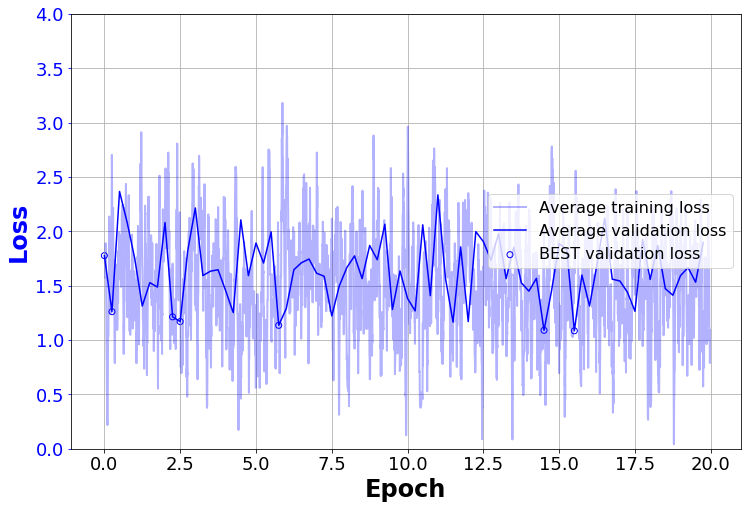

In [17]:
disp_learn_hist_smoothed(loc,window_val=1,window_train=10,losslim=4.0)